<a href="https://colab.research.google.com/github/29Diego24/Lab-7/blob/main/10_minutes_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [6]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [8]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.902660,-0.122299,0.580662,1.171288
2013-01-02,-0.618480,-1.333982,0.751586,1.155418
2013-01-03,0.216884,-1.357633,0.645230,0.482696
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333
2013-01-06,-0.138959,0.028315,0.541956,-0.023289


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [10]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [7]:
df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.902660,-0.122299,0.580662,1.171288
2013-01-02,-0.618480,-1.333982,0.751586,1.155418
2013-01-03,0.216884,-1.357633,0.645230,0.482696
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333
2013-01-06,-0.138959,0.028315,0.541956,-0.023289


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [16]:
df.to_numpy()

array([[ 0.90266008, -0.12229924,  0.58066153,  1.17128771],
       [-0.61847975, -1.33398248,  0.75158611,  1.1554179 ],
       [ 0.21688384, -1.35763268,  0.64522962,  0.48269644],
       [ 1.54697233, -0.64768686, -1.00090208, -0.07992656],
       [-1.86100585, -1.39546458, -0.796559  , -0.02433252],
       [-0.13895902,  0.02831479,  0.54195625, -0.02328912]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.008012,-0.804792,0.120329,0.446976
std,1.193293,0.651017,0.795176,0.591388
min,-1.861006,-1.395465,-1.000902,-0.079927
25%,-0.498600,-1.351720,-0.461930,-0.024072
50%,0.038962,-0.990835,0.561309,0.229704
75%,0.731216,-0.253646,0.629088,0.987238
max,1.546972,0.028315,0.751586,1.171288


Transposing your data:

In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.902660,-0.618480,0.216884,1.546972,-1.861006,-0.138959
B,-0.122299,-1.333982,-1.357633,-0.647687,-1.395465,0.028315
C,0.580662,0.751586,0.645230,-1.000902,-0.796559,0.541956
D,1.171288,1.155418,0.482696,-0.079927,-0.024333,-0.023289


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.171288,0.580662,-0.122299,0.902660
2013-01-02,1.155418,0.751586,-1.333982,-0.618480
2013-01-03,0.482696,0.645230,-1.357633,0.216884
2013-01-04,-0.079927,-1.000902,-0.647687,1.546972
2013-01-05,-0.024333,-0.796559,-1.395465,-1.861006
2013-01-06,-0.023289,0.541956,0.028315,-0.138959


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333
2013-01-03,0.216884,-1.357633,0.645230,0.482696
2013-01-02,-0.618480,-1.333982,0.751586,1.155418
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927
2013-01-01,0.902660,-0.122299,0.580662,1.171288
2013-01-06,-0.138959,0.028315,0.541956,-0.023289


#### 👉 Save your work here




## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [18]:
df["A"]

,A
2013-01-01,0.330974
2013-01-02,-0.082956
2013-01-03,-1.167964
2013-01-04,0.096465
2013-01-05,-0.120212
2013-01-06,-0.941705


Selecting via `[]` (`__getitem__`), which slices the rows:

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,0.330974,0.778889,-0.293737,-1.315599
2013-01-02,-0.082956,0.328607,0.348727,-0.203735
2013-01-03,-1.167964,-0.277554,0.148928,0.278693


In [20]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.082956,0.328607,0.348727,-0.203735
2013-01-03,-1.167964,-0.277554,0.148928,0.278693
2013-01-04,0.096465,-0.772758,-0.299484,0.668725


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [22]:
df.loc[dates[0]]

,2013-01-01
A,0.902660
B,-0.122299
C,0.580662
D,1.171288


Selecting on a multi-axis by label:

In [23]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.902660,-0.122299
2013-01-02,-0.618480,-1.333982
2013-01-03,0.216884,-1.357633
2013-01-04,1.546972,-0.647687
2013-01-05,-1.861006,-1.395465
2013-01-06,-0.138959,0.028315


Showing label slicing, both endpoints are included:

In [24]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.618480,-1.333982
2013-01-03,0.216884,-1.357633
2013-01-04,1.546972,-0.647687


Reduction in the dimensions of the returned object:

In [25]:
df.loc["20130102", ["A", "B"]]

,2013-01-02
A,-0.618480
B,-1.333982


For getting a scalar value:

In [26]:
df.loc[dates[0], "A"]

0.9026600791098612

For getting fast access to a scalar (equivalent to the prior method):

In [27]:
df.at[dates[0], "A"]

0.9026600791098612

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [29]:
df.iloc[3]

,2013-01-04
A,1.546972
B,-0.647687
C,-1.000902
D,-0.079927


By integer slices, acting similar to NumPy/Python:

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.546972,-0.647687
2013-01-05,-1.861006,-1.395465


By lists of integer position locations, similar to the NumPy/Python style:

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.618480,0.751586
2013-01-03,0.216884,0.645230
2013-01-05,-1.861006,-0.796559


For slicing rows explicitly:

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.618480,-1.333982,0.751586,1.155418
2013-01-03,0.216884,-1.357633,0.645230,0.482696


For slicing columns explicitly:

In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.122299,0.580662
2013-01-02,-1.333982,0.751586
2013-01-03,-1.357633,0.645230
2013-01-04,-0.647687,-1.000902
2013-01-05,-1.395465,-0.796559
2013-01-06,0.028315,0.541956


For getting a value explicitly:

In [34]:
df.iloc[1, 1]

-1.3339824825641848

For getting fast access to a scalar (equivalent to the prior method):

In [35]:
df.iat[1, 1]

-1.3339824825641848

### Boolean indexing

Using a single column’s values to select data:

In [36]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.902660,-0.122299,0.580662,1.171288
2013-01-03,0.216884,-1.357633,0.645230,0.482696
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927


Selecting values from a DataFrame where a boolean condition is met:

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.902660,NaN,0.580662,1.171288
2013-01-02,NaN,NaN,0.751586,1.155418
2013-01-03,0.216884,NaN,0.645230,0.482696
2013-01-04,1.546972,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,0.028315,0.541956,NaN


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [38]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.902660,-0.122299,0.580662,1.171288,one
2013-01-02,-0.618480,-1.333982,0.751586,1.155418,one
2013-01-03,0.216884,-1.357633,0.645230,0.482696,two
2013-01-04,1.546972,-0.647687,-1.000902,-0.079927,three
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333,four
2013-01-06,-0.138959,0.028315,0.541956,-0.023289,three


In [39]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.216884,-1.357633,0.645230,0.482696,two
2013-01-05,-1.861006,-1.395465,-0.796559,-0.024333,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

,0
2013-01-02,1
2013-01-03,2
2013-01-04,3
2013-01-05,4
2013-01-06,5
2013-01-07,6


In [42]:
df["F"] = s1

Setting values by label:

In [43]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [44]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [45]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [46]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.580662,5.0,NaN
2013-01-02,-0.618480,-1.333982,0.751586,5.0,1.0
2013-01-03,0.216884,-1.357633,0.645230,5.0,2.0
2013-01-04,1.546972,-0.647687,-1.000902,5.0,3.0
2013-01-05,-1.861006,-1.395465,-0.796559,5.0,4.0
2013-01-06,-0.138959,0.028315,0.541956,5.0,5.0


A `where` operation with setting:

In [47]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.580662,-5.0,NaN
2013-01-02,-0.618480,-1.333982,-0.751586,-5.0,-1.0
2013-01-03,-0.216884,-1.357633,-0.645230,-5.0,-2.0
2013-01-04,-1.546972,-0.647687,-1.000902,-5.0,-3.0
2013-01-05,-1.861006,-1.395465,-0.796559,-5.0,-4.0
2013-01-06,-0.138959,-0.028315,-0.541956,-5.0,-5.0


#### 👉 Save your work here




## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [48]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.580662,5.0,NaN,1.0
2013-01-02,-0.618480,-1.333982,0.751586,5.0,1.0,1.0
2013-01-03,0.216884,-1.357633,0.645230,5.0,2.0,NaN
2013-01-04,1.546972,-0.647687,-1.000902,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [49]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.61848,-1.333982,0.751586,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [50]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.580662,5.0,5.0,1.0
2013-01-02,-0.618480,-1.333982,0.751586,5.0,1.0,1.0
2013-01-03,0.216884,-1.357633,0.645230,5.0,2.0,5.0
2013-01-04,1.546972,-0.647687,-1.000902,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [51]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [52]:
df.mean()

,0
A,-0.142431
B,-0.784409
C,0.120329
D,5.000000
F,3.000000


Same operation on the other axis:

In [54]:
df.mean(1)

,0
2013-01-01,1.395165
2013-01-02,0.959825
2013-01-03,1.300896
2013-01-04,1.579677
2013-01-05,0.989394
2013-01-06,2.086262


Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

,0
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,1.0
2013-01-04,3.0
2013-01-05,5.0
2013-01-06,NaN


In [56]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.783116,-2.357633,-0.354770,4.0,1.0
2013-01-04,-1.453028,-3.647687,-4.000902,2.0,0.0
2013-01-05,-6.861006,-6.395465,-5.796559,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [57]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.580662,5.0,NaN
2013-01-02,-0.618480,-1.333982,1.332248,10.0,1.0
2013-01-03,-0.401596,-2.691615,1.977477,15.0,3.0
2013-01-04,1.145376,-3.339302,0.976575,20.0,6.0
2013-01-05,-0.715629,-4.734767,0.180016,25.0,10.0
2013-01-06,-0.854588,-4.706452,0.721972,30.0,15.0


In [58]:
df.apply(lambda x: x.max() - x.min())

,0
A,3.407978
B,1.423779
C,1.752488
D,0.000000
F,4.000000


### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [59]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

,0
0,4
1,3
2,3
3,2
4,5
5,1
6,5
7,5
8,3
9,0


In [60]:
s.value_counts()

,count
3,3
5,3
4,1
2,1
1,1
0,1


### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [61]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


#### 👉 Save your work here




## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.082472,-0.432724,-0.425337,0.453425
1,-0.430061,2.152573,0.894885,-1.223276
2,-1.159992,-1.163021,0.203700,-0.479239
3,1.303778,-1.260139,0.689420,0.551052
4,-0.520310,0.139481,-0.764723,0.158815
5,0.280109,-0.179092,-0.260651,-0.588104
6,-0.199234,-1.224348,-0.312577,1.180167
7,-0.838558,0.581178,-0.678186,0.077713
8,-0.846722,-3.602777,1.427453,0.536597
9,-0.364156,1.967526,0.787138,2.251376


In [63]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-0.082472,-0.432724,-0.425337,0.453425
1,-0.430061,2.152573,0.894885,-1.223276
2,-1.159992,-1.163021,0.203700,-0.479239
3,1.303778,-1.260139,0.689420,0.551052
4,-0.520310,0.139481,-0.764723,0.158815
5,0.280109,-0.179092,-0.260651,-0.588104
6,-0.199234,-1.224348,-0.312577,1.180167
7,-0.838558,0.581178,-0.678186,0.077713
8,-0.846722,-3.602777,1.427453,0.536597
9,-0.364156,1.967526,0.787138,2.251376


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [64]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [65]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 👉 Save your work here




## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [66]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.035552,-0.480089
1,bar,one,0.339365,0.493740
2,foo,two,0.330150,-1.170783
3,bar,three,0.755620,-0.229785
4,foo,two,0.810998,-0.518714
5,bar,two,-1.239830,0.719427
6,foo,one,-1.134916,-1.049054
7,bar,three,-0.346621,-1.600508


Grouping and then applying the `sum()` funcion to the resulting group:

In [67]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-0.491466,-0.617126
foo,0.041784,-3.218640


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [68]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.339365  0.493740
    three  0.408999 -1.830292
    two   -1.239830  0.719427
foo one   -1.099364 -1.529143
    two    1.141148 -1.689498

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [69]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.943428  0.025557
      two    -0.308516 -0.132412
baz   one     0.268777  0.028607
      two     1.418096  0.900627

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [70]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.943428
               B    0.025557
       two     A   -0.308516
               B   -0.132412
baz    one     A    0.268777
               B    0.028607
       two     A    1.418096
               B    0.900627
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [71]:
stacked.unstack()

A         B
first second                    
bar   one    -0.943428  0.025557
      two    -0.308516 -0.132412
baz   one     0.268777  0.028607
      two     1.418096  0.900627

In [72]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.943428 -0.308516
      B  0.025557 -0.132412
baz   A  0.268777  1.418096
      B  0.028607  0.900627

In [73]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.943428  0.268777
       B  0.025557  0.028607
two    A -0.308516  1.418096
       B -0.132412  0.900627

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [74]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.862105,0.973147
1,one,B,foo,0.206908,-0.094874
2,two,C,foo,1.747597,-0.030648
3,three,A,bar,-0.246047,-0.502081
4,one,B,bar,-0.373860,0.233584
5,one,C,bar,0.385265,-0.616020
6,two,A,foo,-0.505098,0.469785
7,three,B,foo,0.247532,-1.196441
8,one,C,foo,0.590717,-0.337423
9,one,A,bar,1.019966,0.650442


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [75]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.019966  0.862105
      B -0.373860  0.206908
      C  0.385265  0.590717
three A -0.246047       NaN
      B       NaN  0.247532
      C  1.599826       NaN
two   A       NaN -0.505098
      B -0.489814       NaN
      C       NaN  1.747597

#### 👉 Save your work here




## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [78]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

<ipython-input-78-ea0410cbc73d>:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range("1/1/2012", periods=100, freq="S")


,0
2012-01-01,26021


[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [79]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -2.048112
2012-03-07   -0.108557
2012-03-08    1.226604
2012-03-09    1.217032
2012-03-10    0.172908
Freq: D, dtype: float64 



,0
2012-03-06 00:00:00+00:00,-2.048112
2012-03-07 00:00:00+00:00,-0.108557
2012-03-08 00:00:00+00:00,1.226604
2012-03-09 00:00:00+00:00,1.217032
2012-03-10 00:00:00+00:00,0.172908


Converting between time span representations:

In [80]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

<ipython-input-80-9cfad7bb29ec>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range("1/1/2012", periods=5, freq="M")


,0
2012-01,-1.465969
2012-02,0.064842
2012-03,-0.745394
2012-04,0.139204
2012-05,-1.801228


In [81]:
ps.to_timestamp()

,0
2012-01-01,-1.465969
2012-02-01,0.064842
2012-03-01,-0.745394
2012-04-01,0.139204
2012-05-01,-1.801228


Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [82]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

<ipython-input-82-7eef4fe49a0a>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


,0
1990-03-01 09:00,-0.262218
1990-06-01 09:00,0.270533
1990-09-01 09:00,0.751964
1990-12-01 09:00,0.569379
1991-03-01 09:00,0.001003


## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [83]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [84]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

,grade
0,a
1,b
2,b
3,a
4,a
5,e


Rename the categories to more meaningful names:

In [85]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [86]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

,grade
0,very good
1,good
2,good
3,very good
4,very good
5,very bad


Sorting is per order in the categories, not lexical order:

In [87]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [88]:
df.groupby("grade").size()

<ipython-input-88-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

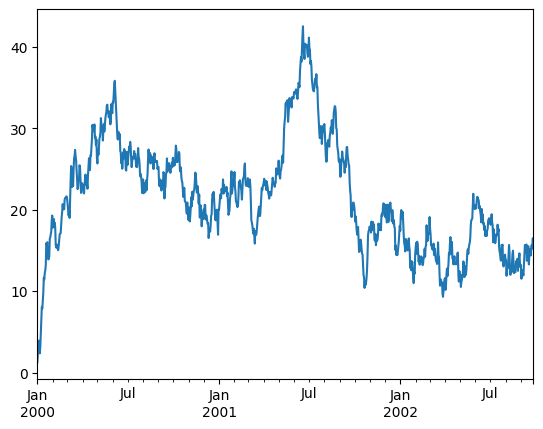

In [89]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

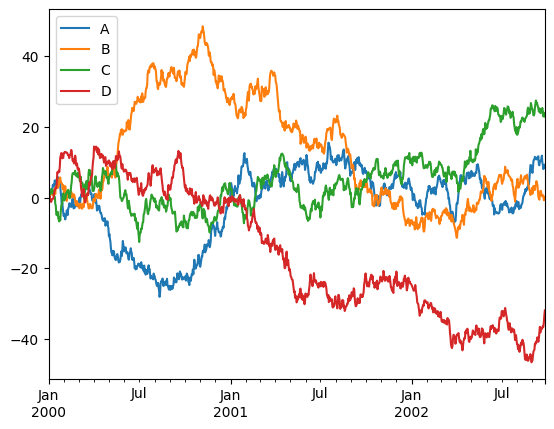

In [90]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

#### 👉 Save your work here




## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [ ]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
pd.read_csv("foo.csv")

### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [ ]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [ ]:
pd.read_hdf("foo.h5", "df")

### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.

#### 👉 Save your work here


